In [1]:
import pandas as pd

In [2]:
# Load Dataset

dataset = pd.read_csv("dataset.csv")

In [3]:
# drop nulls

dataset = dataset.dropna()

In [4]:
# Check load

print(dataset.shape)
print(dataset.columns)
dataset.head()


(113999, 21)
Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Filter songs by popularity (dataset is too big)

dataset = dataset[dataset["popularity"] > 50]

In [6]:
# Feature Selection and Y target set

features = ['artists', 
             'album_name', 
             'track_name', 
             'duration_ms', 
             'danceability', 
             'energy', 
             'key', 
             'loudness', 
             'mode', 
             'speechiness', 
             'acousticness', 
             'instrumentalness', 
             'liveness', 
             'valence', 
             'tempo', 
             'time_signature', 
             'track_genre']

dataset = dataset[features]
dataset["y_target"] = -1

In [7]:
# Check feature selection

dataset.shape
dataset.head()

,artists,album_name,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,y_target
0,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,-1
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,-1
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,-1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,-1
4,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,-1


In [8]:
# User trains by choosing his favorite artist (or songs)

dataset.loc[dataset["artists"] == "Bob Dylan", "y_target"] = 1
dataset.loc[dataset["artists"] == "The Rolling Stones", "y_target"] = 1
dataset.loc[dataset["artists"] == "The Beatles", "y_target"] = 1
dataset.loc[dataset["artists"] == "Roberto Carlos", "y_target"] = 1
dataset.loc[dataset["artists"] == "Os Mutantes", "y_target"] = 1
dataset.loc[dataset["artists"] == "Caetano Veloso", "y_target"] = 1
dataset.loc[dataset["artists"] == "Chico Buarque", "y_target"] = 1

# else is 0

dataset.loc[dataset["y_target"] == -1, "y_target"] = 0

In [9]:
from sklearn.preprocessing import StandardScaler

# Normalize features

features_to_normalize = [
             'duration_ms', 
             'danceability', 
             'energy', 
             'key', 
             'loudness', 
             'mode', 
             'speechiness', 
             'acousticness', 
             'instrumentalness', 
             'liveness', 
             'valence', 
             'tempo', 
             'time_signature']

scaler = StandardScaler()
dataset[features_to_normalize] = scaler.fit_transform(dataset[features_to_normalize])

In [10]:
# Check normalization

dataset.head()

,artists,album_name,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,y_target
0,Gen Hoshino,Comedy,Comedy,0.139969,0.576567,-0.710243,-1.207845,0.236356,-1.264793,0.890648,-0.831466,-0.422032,1.169111,1.082907,-1.152304,0.207002,acoustic,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,-0.952834,-1.005688,-1.939028,-1.207845,-1.814047,0.790643,0.011188,1.999082,-0.422014,-0.561648,-0.787939,-1.510616,0.207002,acoustic,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,-0.127515,-0.894436,-1.135111,-1.488730,-0.347742,0.790643,-0.260430,-0.267134,-0.422035,-0.453897,-1.401810,-1.550371,0.207002,acoustic,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,-0.247411,-1.957514,-2.382224,-1.488730,-2.064263,0.790643,-0.516225,1.938776,-0.421768,-0.352880,-1.305762,2.071509,-2.481704,acoustic,0
4,Chord Overstreet,Hold On,Hold On,-0.288936,0.218088,-0.785220,-0.926960,-0.337381,0.790643,-0.301304,0.554925,-0.422035,-0.683542,-1.205538,-0.051666,0.207002,acoustic,0


In [11]:
# Generate new_dataset with same amount of examples True and False

true = dataset[dataset["y_target"] == 1]
false = dataset[dataset["y_target"] == 0].sample(true.shape[0])

new_dataset = pd.concat([true, false], axis=0)

In [13]:
# Encode categorical variables
columns = ['artists', 'album_name', 'track_name', 'track_genre']

dummies = pd.get_dummies(new_dataset, columns=columns, drop_first=False)
dataset = new_dataset[columns]
dataset = pd.concat([dataset, dummies], axis=1)

In [14]:
from sklearn.model_selection import train_test_split

# Split train test

X = dataset.drop("y_target", axis=1)
y = dataset["y_target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

backup_X_test = X_test.copy()

X_train = X_train.drop(['artists', 'album_name', 'track_name', 'track_genre'], axis=1)
X_test = X_test.drop(['artists', 'album_name', 'track_name', 'track_genre'], axis=1)

print("Número de amostras no conjunto de treinamento:", X_train.shape[0])
print("Número de amostras no conjunto de teste:", X_test.shape[0])

Número de amostras no conjunto de treinamento: 507
Número de amostras no conjunto de teste: 127


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Criando uma instância do classificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=11)  # Defina o número de vizinhos conforme necessário

# Treinando o modelo com os dados de treinamento
knn_classifier.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = knn_classifier.predict(X_test)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        61
           1       0.74      1.00      0.85        66

    accuracy                           0.82       127
   macro avg       0.87      0.81      0.81       127
weighted avg       0.87      0.82      0.81       127



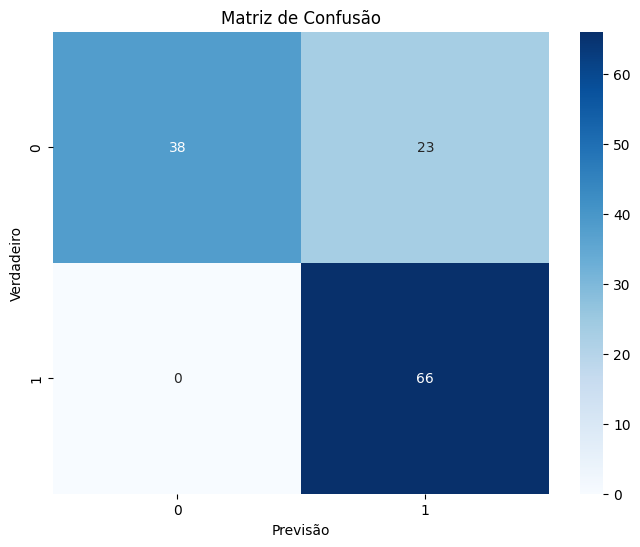

In [16]:
# Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [17]:
# Output Csv

output = backup_X_test
output["y_target"] = y_pred

output[["artists", "track_name", "album_name", "y_target"]].sort_values("y_target").to_csv("output-by-artists.csv")